In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import ast
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)

In [35]:
tiktok = pd.read_csv('tiktok_cleaned.csv')
ig = pd.read_csv('ig_cleaned.csv')

In [36]:
#I'll do tiktok first
#X/y splitting
y = tiktok['views']
X = tiktok.drop(columns=['views', 'caption'])

#numerical and categorical split
X['verified_status'] = X['verified_status'].astype('category')

num = X.select_dtypes(include=['int64', 'float64']).columns
cat = X.select_dtypes(include=['object', 'category']).columns 

In [37]:
#Scale Numerical Features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[num])

# Convert scaled numerical features back to DataFrame
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=num)

#Encode Categorical Features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[cat])

# Get the feature names for the encoded categorical features
categorical_feature_names = encoder.get_feature_names_out(cat)

# Convert encoded categorical features to DataFrame
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

# Combine the scaled numerical features and encoded categorical features
X_preprocessed_tiktok = pd.concat([X_numerical_scaled_df, X_categorical_encoded_df], axis=1)

# Display the first few rows of the preprocessed DataFrame
print(X_preprocessed_tiktok.head())

   duration     likes  comments    shares  downloads  verified_status_0  \
0  1.637872 -0.486292 -0.436849 -0.514877  -0.523104                1.0   
1 -0.026119 -0.052090  0.418560  0.071757   0.055667                1.0   
2 -0.087748  0.100327 -0.025402 -0.433186  -0.107985                1.0   
3 -0.457524  1.166638  0.293500  0.564275   0.092090                1.0   
4 -0.827300 -0.369650 -0.246758 -0.394104  -0.250682                1.0   

   verified_status_1  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  


In [38]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize a dictionary to store model results
model_results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    return {
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    }

In [39]:
# Model 1: Linear Regression
linear_model = LinearRegression()
model_results['Linear Regression'] = evaluate_model(linear_model, X_train, X_test, y_train, y_test)

# Model 2: K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=3)
model_results['K-Nearest Neighbors'] = evaluate_model(knn, X_train, X_test, y_train, y_test)

# Model 3: Decision Tree Regressor
regr = DecisionTreeRegressor(random_state=42)
model_results['Decision Tree'] = evaluate_model(regr, X_train, X_test, y_train, y_test)

# Model 4: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
model_results['Random Forest'] = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Model 5: Stochastic Gradient Descent Regressor
sgd = SGDRegressor(random_state=42)
model_results['Stochastic Gradient Descent'] = evaluate_model(sgd, X_train, X_test, y_train, y_test)

# Model 6: Multi-Layer Perceptron Regressor
mlp = MLPRegressor(random_state=42, max_iter=1000)
model_results['Multi-Layer Perceptron'] = evaluate_model(mlp, X_train, X_test, y_train, y_test)

In [40]:
regressor_model = pd.DataFrame(model_results).T
print('Results of different models:')
regressor_model

Results of different models:


,Train R2,Test R2,Train MSE,Test MSE,Train RMSE,Test RMSE
Linear Regression,6.533374e-01,6.320328e-01,3.615416e+10,3.830568e+10,1.901425e+05,1.957184e+05
K-Nearest Neighbors,8.456713e-01,6.793858e-01,1.609526e+10,3.337619e+10,1.268671e+05,1.826915e+05
Decision Tree,1.000000e+00,5.055430e-01,1.502526e+03,5.147337e+10,3.876243e+01,2.268774e+05
Random Forest,9.657215e-01,7.319605e-01,3.574976e+09,2.790313e+10,5.979110e+04,1.670423e+05
Stochastic Gradient Descent,-5.431366e+26,-5.378412e+26,5.664484e+37,5.598970e+37,7.526277e+18,7.482627e+18
Multi-Layer Perceptron,7.010615e-01,6.829511e-01,3.117692e+10,3.300504e+10,1.765699e+05,1.816729e+05


In [41]:
#Random Forest is the best model here.

In [42]:
#I'll do instagram now
#X/y splitting
y = ig['plays']
X = ig.drop(columns=['plays', 'caption', 'day'])

num = X.select_dtypes(include=['int64', 'float64']).columns
cat = X.select_dtypes(include=['object', 'category']).columns 

In [43]:
#Scale Numerical Features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[num])

# Convert scaled numerical features back to DataFrame
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=num)

#Encode Categorical Features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[cat])

# Get the feature names for the encoded categorical features
categorical_feature_names = encoder.get_feature_names_out(cat)

# Convert encoded categorical features to DataFrame
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names)

# Combine the scaled numerical features and encoded categorical features
X_preprocessed_ig = pd.concat([X_numerical_scaled_df, X_categorical_encoded_df], axis=1)

# Display the first few rows of the preprocessed DataFrame
print(X_preprocessed_ig.head())

   duration  mentions  hashtags     likes  comments     views      hour
0 -0.184436  0.125068  0.226039 -0.251850 -0.193346 -0.310907  1.368982
1 -0.254667 -0.370240  4.813590 -0.267941 -0.203389 -0.317086  1.549782
2 -0.233966 -0.370240 -0.498311 -0.265742 -0.201987 -0.312375  1.188181
3 -0.011193  0.125068  0.226039 -0.260393 -0.193696 -0.271356 -1.162223
4  0.133200 -0.370240 -0.498311  0.276347  1.418274  0.494260  1.007381


In [44]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize a dictionary to store model results
model_results = {}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    return {
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse
    }

In [45]:
# Model 1: Linear Regression
linear_model = LinearRegression()
model_results['Linear Regression'] = evaluate_model(linear_model, X_train, X_test, y_train, y_test)

# Model 2: K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=3)
model_results['K-Nearest Neighbors'] = evaluate_model(knn, X_train, X_test, y_train, y_test)

# Model 3: Decision Tree Regressor
regr = DecisionTreeRegressor(random_state=42)
model_results['Decision Tree'] = evaluate_model(regr, X_train, X_test, y_train, y_test)

# Model 4: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
model_results['Random Forest'] = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Model 5: Stochastic Gradient Descent Regressor
sgd = SGDRegressor(random_state=42)
model_results['Stochastic Gradient Descent'] = evaluate_model(sgd, X_train, X_test, y_train, y_test)

# Model 6: Multi-Layer Perceptron Regressor
mlp = MLPRegressor(random_state=42, max_iter=1000)
model_results['Multi-Layer Perceptron'] = evaluate_model(mlp, X_train, X_test, y_train, y_test)

In [46]:
regressor_model = pd.DataFrame(model_results).T
print('Results of different models:')
regressor_model

Results of different models:


,Train R2,Test R2,Train MSE,Test MSE,Train RMSE,Test RMSE
Linear Regression,9.266842e-01,6.850931e-01,4.974907e+12,2.640536e+13,2.230450e+06,5.138615e+06
K-Nearest Neighbors,9.305490e-01,7.780788e-01,4.712659e+12,1.860839e+13,2.170866e+06,4.313745e+06
Decision Tree,1.000000e+00,7.274072e-01,2.716998e-21,2.285727e+13,5.212483e-11,4.780928e+06
Random Forest,9.718410e-01,7.219726e-01,1.910751e+12,2.331297e+13,1.382299e+06,4.828350e+06
Stochastic Gradient Descent,-3.466062e+27,-5.017670e+27,2.351925e+41,4.207384e+41,4.849665e+20,6.486435e+20
Multi-Layer Perceptron,9.284111e-01,6.798181e-01,4.857723e+12,2.684768e+13,2.204024e+06,5.181475e+06


In [47]:
#Best Model: K-Nearest Neighbors, but it doesn't provide feature importances directly, so we'll use Random Forest for this analysis

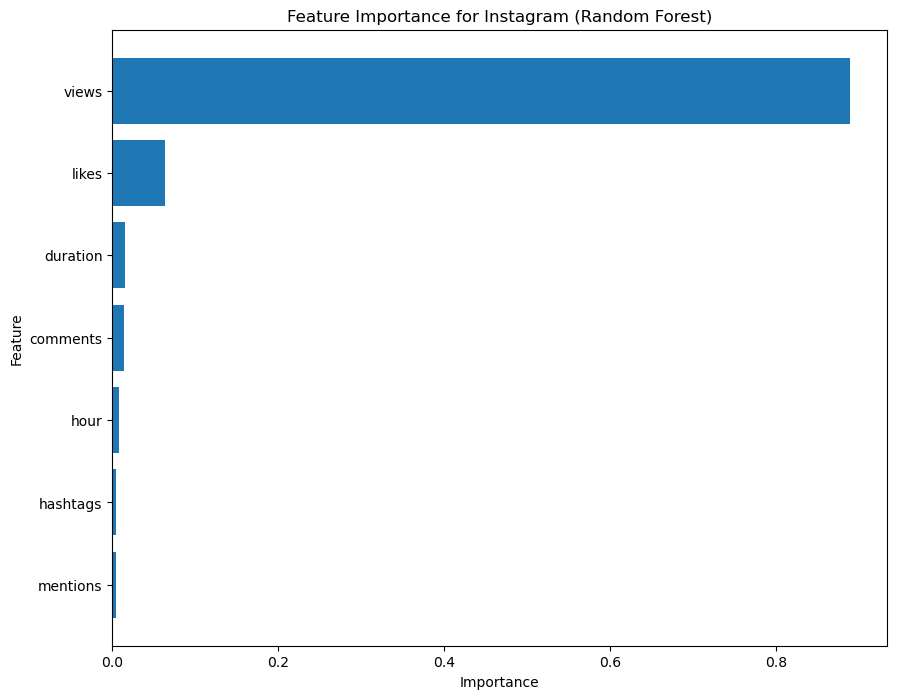

In [48]:
rf_ig = RandomForestRegressor(random_state=42)
rf_ig.fit(X_train, y_train)

# Get feature importances
ig_feature_importances = rf_ig.feature_importances_
ig_features = X_preprocessed_ig.columns

# Create a DataFrame for feature importances
ig_importance_df = pd.DataFrame({'Feature': ig_features, 'Importance': ig_feature_importances})
ig_importance_df = ig_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(ig_importance_df['Feature'], ig_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Instagram (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

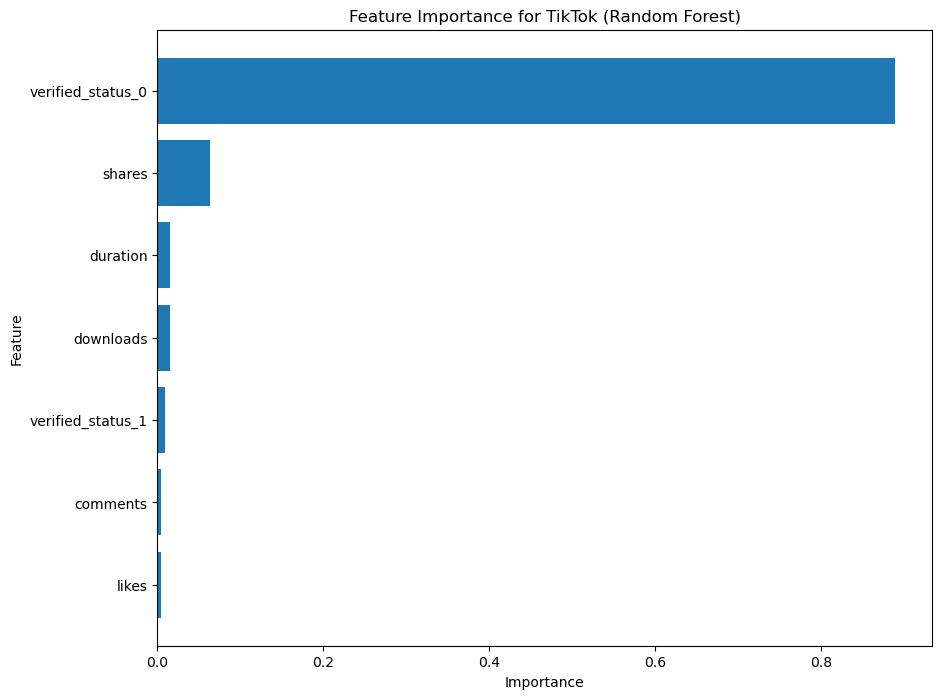

In [49]:
tiktok_feature_importances = rf.feature_importances_
tiktok_features = X_preprocessed_tiktok.columns

# Create a DataFrame for feature importances
tiktok_importance_df = pd.DataFrame({'Feature': tiktok_features, 'Importance': tiktok_feature_importances})
tiktok_importance_df = tiktok_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(tiktok_importance_df['Feature'], tiktok_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for TikTok (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [50]:
# Correlation analysis for Instagram
igt = ig.drop(['day', 'caption'], axis=1)
ig_corr = igt.corr()
print("Correlation matrix for Instagram:")
print(ig_corr['plays'].sort_values(ascending=False))

Correlation matrix for Instagram:
plays       1.000000
views       0.931456
likes       0.798161
comments    0.563147
mentions   -0.005603
duration   -0.006817
hour       -0.027687
hashtags   -0.070700
Name: plays, dtype: float64


In [51]:
# Correlation analysis for TikTok
tiktok = tiktok.drop('caption', axis=1)
tiktok_corr = tiktok.corr()
print("Correlation matrix for tiktok:")
print(tiktok_corr['views'].sort_values(ascending=False))

Correlation matrix for tiktok:
views              1.000000
likes              0.804322
shares             0.665635
downloads          0.664222
comments           0.554172
duration           0.008481
verified_status   -0.130983
Name: views, dtype: float64


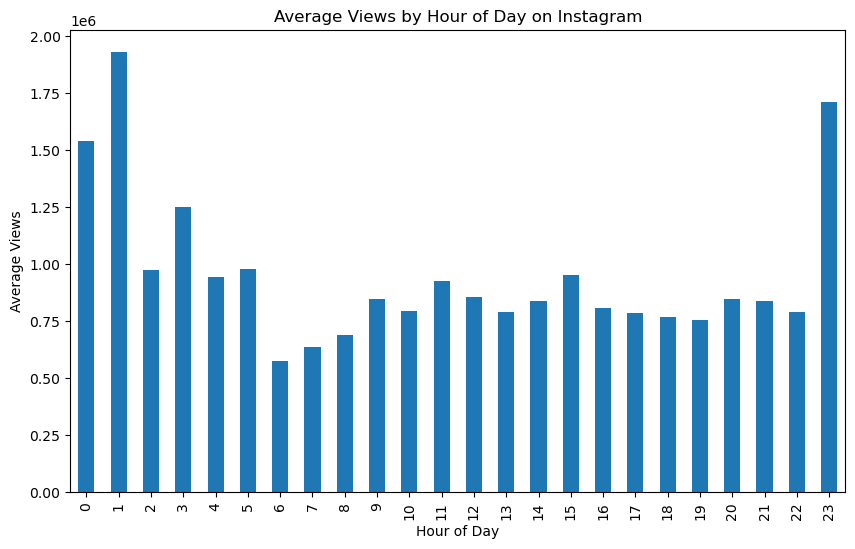

In [52]:
ig_hourly_views = ig.groupby('hour')['views'].mean()
plt.figure(figsize=(10, 6))
ig_hourly_views.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.title('Average Views by Hour of Day on Instagram')
plt.show()

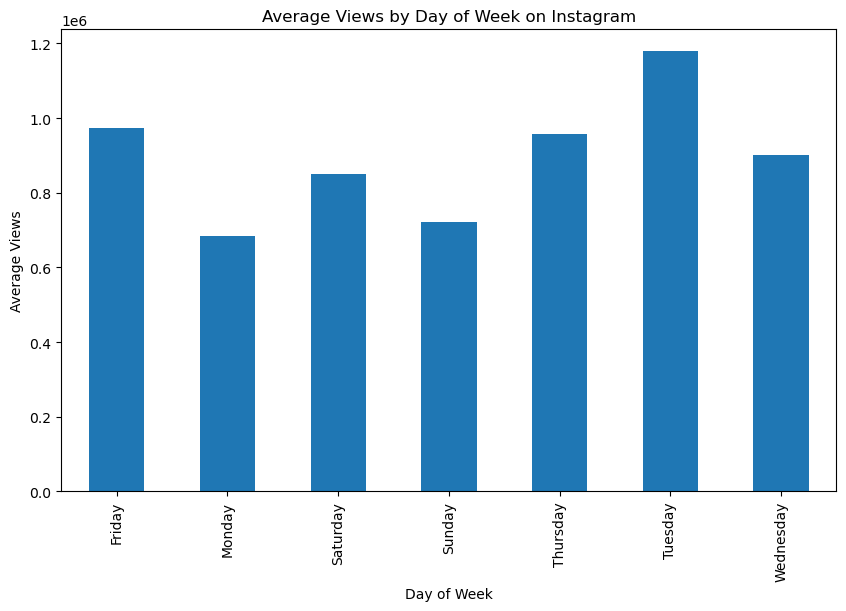

In [53]:
ig_daily_views = ig.groupby('day')['views'].mean()
plt.figure(figsize=(10, 6))
ig_daily_views.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Views')
plt.title('Average Views by Day of Week on Instagram')
plt.show()

In [54]:
# Instagram engagement metrics
ig_engagement_corr = ig[['likes', 'comments', 'views']].corr()
print("Engagement metrics correlation for Instagram:")
print(ig_engagement_corr)

# TikTok engagement metrics
tiktok_engagement_corr = tiktok[['likes', 'comments', 'shares', 'downloads', 'views']].corr()
print("Engagement metrics correlation for TikTok:")
print(tiktok_engagement_corr)

Engagement metrics correlation for Instagram:
             likes  comments     views
likes     1.000000  0.489768  0.855518
comments  0.489768  1.000000  0.501761
views     0.855518  0.501761  1.000000
Engagement metrics correlation for TikTok:
              likes  comments    shares  downloads     views
likes      1.000000  0.687185  0.825789   0.823554  0.804322
comments   0.687185  1.000000  0.574632   0.832464  0.554172
shares     0.825789  0.574632  1.000000   0.679910  0.665635
downloads  0.823554  0.832464  0.679910   1.000000  0.664222
views      0.804322  0.554172  0.665635   0.664222  1.000000


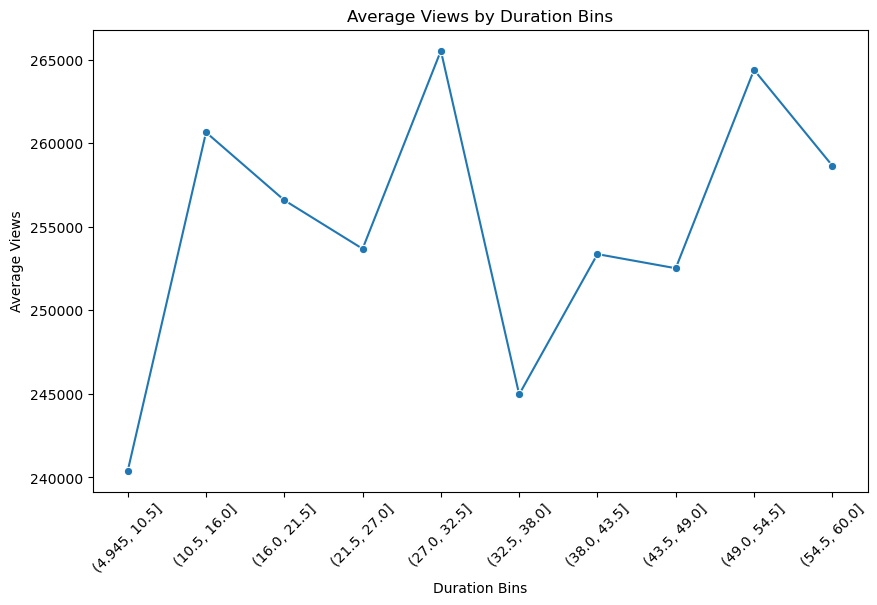

In [55]:
# Convert duration_bin to string for proper plotting
duration_views['duration_bin'] = duration_views['duration_bin'].astype(str)

# Line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='duration_bin', y='views', data=duration_views, marker='o')
plt.title('Average Views by Duration Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()
